In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns

tf.random.set_seed(1)

# [Module 77: multi class classification part 1 (preparing data)](https://youtu.be/ZUKz4125WNI?t=7828)

We'll make a neural network to classify different items of clothing

In [3]:
# downlaod data
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

### Getting a sense of the data

In [4]:
print(train_data[0])
print("---")
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
print(train_data[0].shape, train_labels[0].shape)
# ok so it's 28z28 pixels for input and number representing category for output

(28, 28) ()


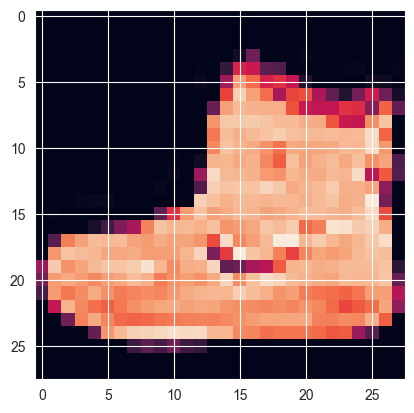

9


In [6]:
plt.imshow(train_data[0])
plt.show()
print(train_labels[0])

# [Module 78: multi class classification part 2 (becoming one with the data)](https://youtu.be/ZUKz4125WNI?t=7828)

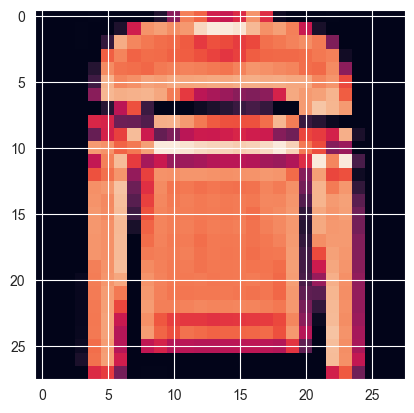

Pullover


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

i = 5
plt.imshow(train_data[i])
plt.show()
print(class_names[train_labels[i]])


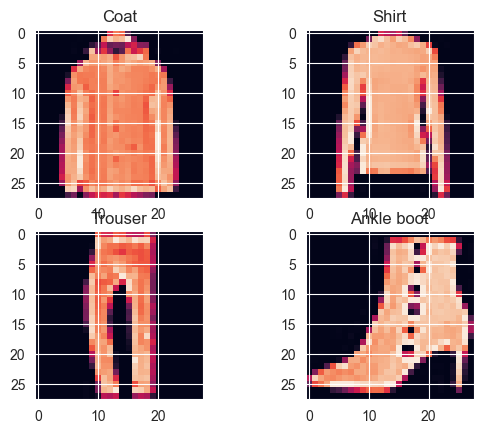

In [8]:
# plot a bunch of random images
import random
fig, ax = plt.subplots(2, 2)
for _ in range(8):
    current = random.choice(range(len(train_data)))
    ax[0][0].imshow(train_data[current])
    ax[0][0].set_title(class_names[train_labels[current]])

    current = random.choice(range(len(train_data)))
    ax[0][1].imshow(train_data[current])
    ax[0][1].set_title(class_names[train_labels[current]])

    current = random.choice(range(len(train_data)))
    ax[1][0].imshow(train_data[current])
    ax[1][0].set_title(class_names[train_labels[current]])

    current = random.choice(range(len(train_data)))
    ax[1][1].imshow(train_data[current])
    ax[1][1].set_title(class_names[train_labels[current]])

# [Module 78: multi class classification part 3: building multi-class classification model](https://youtu.be/ZUKz4125WNI?t=8893)

1. Input shape: 28x28
2. Output shape: 10 (one per type of clothing)
3. Loss function: tf.keras.losses.CategoricalCrossentropy() if one hot encoded. int => SparseCategoricalCrossentropy()
4. Output layer activation: softmax

In [9]:
# create model
multi_model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

multi_model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # CategoricalCrossentropy() only for one hot encoded
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

non_norm_hist = multi_model1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))



Epoch 1/10


2023-02-24 10:32:46.193121: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 506us/step - loss: 1.8056 - accuracy: 0.4539 - val_loss: 1.0581 - val_accuracy: 0.5973
Epoch 2/10
1875/1875 [==============================] - 1s 459us/step - loss: 0.9370 - accuracy: 0.6434 - val_loss: 0.8715 - val_accuracy: 0.6693
Epoch 3/10
1875/1875 [==============================] - 1s 482us/step - loss: 0.8450 - accuracy: 0.6728 - val_loss: 0.8333 - val_accuracy: 0.6862
Epoch 4/10
1875/1875 [==============================] - 1s 573us/step - loss: 0.8140 - accuracy: 0.6833 - val_loss: 0.8638 - val_accuracy: 0.6862
Epoch 5/10
1875/1875 [==============================] - 1s 499us/step - loss: 0.7712 - accuracy: 0.6950 - val_loss: 0.7359 - val_accuracy: 0.7174
Epoch 6/10
1875/1875 [==============================] - 1s 457us/step - loss: 0.7237 - accuracy: 0.7134 - val_loss: 0.7042 - val_accuracy: 0.7159
Epoch 7/10
1875/1875 [==============================] - 1s 457us/step - loss: 0.6953 - accuracy: 0.7225 - val_loss: 0.6688 - val_accura

# [Module 82 multi-class classification part 4 (improving our model)](https://youtu.be/ZUKz4125WNI?t=9832)

In [10]:
print(train_data.min(), train_data.max())
# we can normalize to get 0-255 to 0-1
normalized_x_train = train_data / 255.0
normalized_x_test = test_data / 255.0
print(normalized_x_train.min(), normalized_x_train.max())


0 255
0.0 1.0


In [11]:
# trying the model with normalized data. Works much better!
multi_model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

multi_model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer="Adam",
                     metrics=["accuracy"])

norm_history = multi_model2.fit(normalized_x_train, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 636us/step - loss: 0.5229 - accuracy: 0.8158 - val_loss: 68.0415 - val_accuracy: 0.8207
Epoch 2/10
1875/1875 [==============================] - 1s 762us/step - loss: 0.3874 - accuracy: 0.8595 - val_loss: 68.7540 - val_accuracy: 0.8308
Epoch 3/10
1875/1875 [==============================] - 1s 599us/step - loss: 0.3515 - accuracy: 0.8713 - val_loss: 76.0950 - val_accuracy: 0.8110
Epoch 4/10
1875/1875 [==============================] - 1s 626us/step - loss: 0.3310 - accuracy: 0.8781 - val_loss: 68.5045 - val_accuracy: 0.8360
Epoch 5/10
1875/1875 [==============================] - 1s 614us/step - loss: 0.3111 - accuracy: 0.8845 - val_loss: 82.3811 - val_accuracy: 0.8238
Epoch 6/10
1875/1875 [==============================] - 1s 635us/step - loss: 0.2980 - accuracy: 0.8896 - val_loss: 67.3568 - val_accuracy: 0.8393
Epoch 7/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.2892 - accuracy: 0.8917 - val_loss: 77

# [Module 83 mutli class classification 5: comparing normalized data to non-normalized](https://www.youtube.com/watch?t=9832&v=ZUKz4125WNI&feature=youtu.be&ab_channel=DanielBourke)

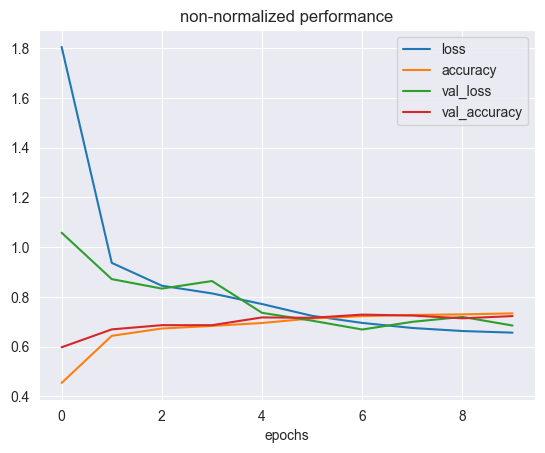

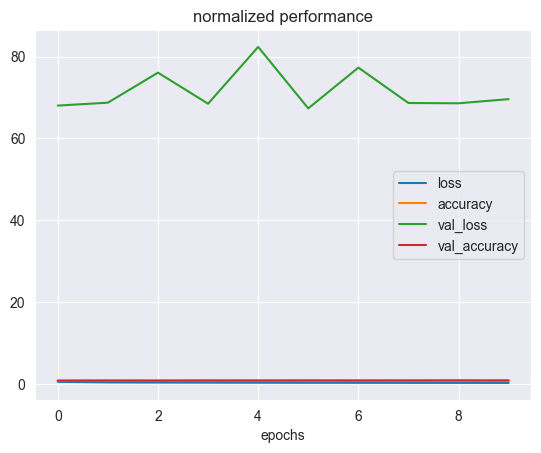

In [12]:
pd.DataFrame(non_norm_hist.history).plot()
plt.xlabel("epochs")
plt.title("non-normalized performance")
plt.show()
pd.DataFrame(norm_history.history).plot()
plt.xlabel("epochs")
plt.title("normalized performance")
plt.show()

# [Module 84 mutli class classification 6: finding ideal learning rate](https://youtu.be/ZUKz4125WNI?t=10848)

In [13]:
# start off same as before
multi_model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

multi_model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

# create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(-20))

# fit the model
find_lr_history = multi_model3.fit(normalized_x_train, train_labels, epochs=40, validation_data=(normalized_x_train, train_labels), verbose=1, callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3722 - accuracy: 0.0966 - val_loss: 2.3722 - val_accuracy: 0.0966 - lr: 1.0000e-24
Epoch 2/40
1875/1875 [==============================] - 2s 855us/step - loss: 2.3722 - accuracy: 0.0966 - val_loss: 2.3722 - val_accuracy: 0.0966 - lr: 1.0000e-24
Epoch 3/40
1875/1875 [==============================] - 2s 918us/step - loss: 2.3722 - accuracy: 0.0966 - val_loss: 2.3722 - val_accuracy: 0.0966 - lr: 1.0000e-24
Epoch 4/40
1875/1875 [==============================] - 2s 874us/step - loss: 2.3722 - accuracy: 0.0966 - val_loss: 2.3722 - val_accuracy: 0.0966 - lr: 1.0000e-24
Epoch 5/40
1875/1875 [==============================] - 2s 899us/step - loss: 2.3722 - accuracy: 0.0966 - val_loss: 2.3722 - val_accuracy: 0.0966 - lr: 1.0000e-24
Epoch 6/40
1875/1875 [==============================] - 2s 891us/step - loss: 2.3722 - accuracy: 0.0966 - val_loss: 2.3722 - val_accuracy: 0.0966 - lr: 1.0000e-24
Epoch 7/40
1875/1875 [==

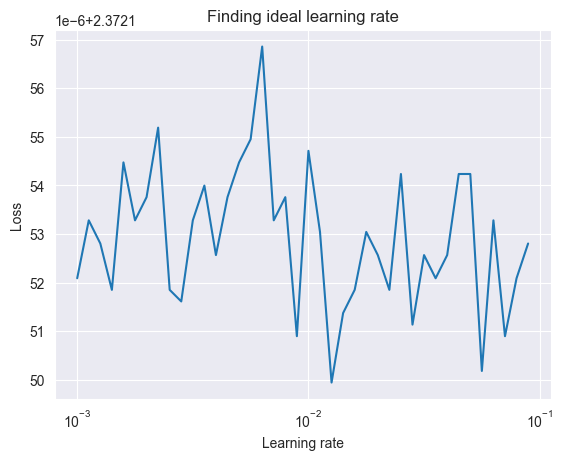

In [14]:
# plot learning rate decay curve. why does this look weird?
lrs = 10e-4 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")
plt.show()

In [15]:
# making a NN with changed learning rate
multi_model4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

multi_model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                     metrics=["accuracy"])

# fit the model
multi_4_hist = multi_model4.fit(normalized_x_train, train_labels, epochs=20, validation_data=(normalized_x_train, train_labels), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 2s 953us/step - loss: 0.5097 - accuracy: 0.8167 - val_loss: 0.4405 - val_accuracy: 0.8371
Epoch 2/20
1875/1875 [==============================] - 2s 866us/step - loss: 0.4002 - accuracy: 0.8540 - val_loss: 0.3597 - val_accuracy: 0.8698
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3756 - accuracy: 0.8647 - val_loss: 0.3599 - val_accuracy: 0.8681
Epoch 4/20
1875/1875 [==============================] - 2s 908us/step - loss: 0.3617 - accuracy: 0.8695 - val_loss: 0.3288 - val_accuracy: 0.8784
Epoch 5/20
1875/1875 [==============================] - 2s 878us/step - loss: 0.3490 - accuracy: 0.8733 - val_loss: 0.3137 - val_accuracy: 0.8835
Epoch 6/20
1875/1875 [==============================] - 2s 871us/step - loss: 0.3364 - accuracy: 0.8773 - val_loss: 0.3132 - val_accuracy: 0.8841
Epoch 7/20
1875/1875 [==============================] - 2s 897us/step - loss: 0.3330 - accuracy: 0.8778 - val_loss: 0.3477 - v

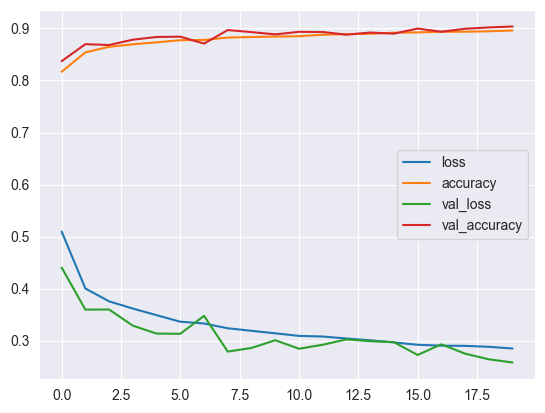

In [16]:
pd.DataFrame(multi_4_hist.history).plot()
plt.show()

# [Module 85 mutli class classification 7: evaluating our model](https://youtu.be/ZUKz4125WNI?t=11487)
We can evaluate it by:
1. using other classification methods like confusion matrix
2. assess predictions with visualizations
3. improve its results (by training for longer or adjusting architecture)
4. save and export for use in future application

# [Module 86 mutli class classification 8: evaluating our model with a confusion matrix](https://youtu.be/ZUKz4125WNI?t=12334)


In [17]:
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
    plt.style.use("default")
    import itertools
    from sklearn.metrics import confusion_matrix
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

  # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

    plt.show()

In [18]:
y_pred_probs = multi_model4.predict(normalized_x_test)
print(y_pred_probs[0], class_names[np.argmax(y_pred_probs[0])])  # each element of y_pred_probs at index i is p(category i)

# let's turn predict probability arrays into integers
y_pred = y_pred_probs.argmax(axis=1)
display(y_pred)

313/313 [==============================] - 0s 381us/step
[9.7950530e-19 3.3759530e-17 7.1179977e-17 5.5555844e-19 7.5159568e-16
 7.6774985e-04 2.6955577e-20 1.1741819e-02 1.5701380e-09 9.8749048e-01] Ankle boot


array([9, 2, 1, ..., 8, 1, 5])

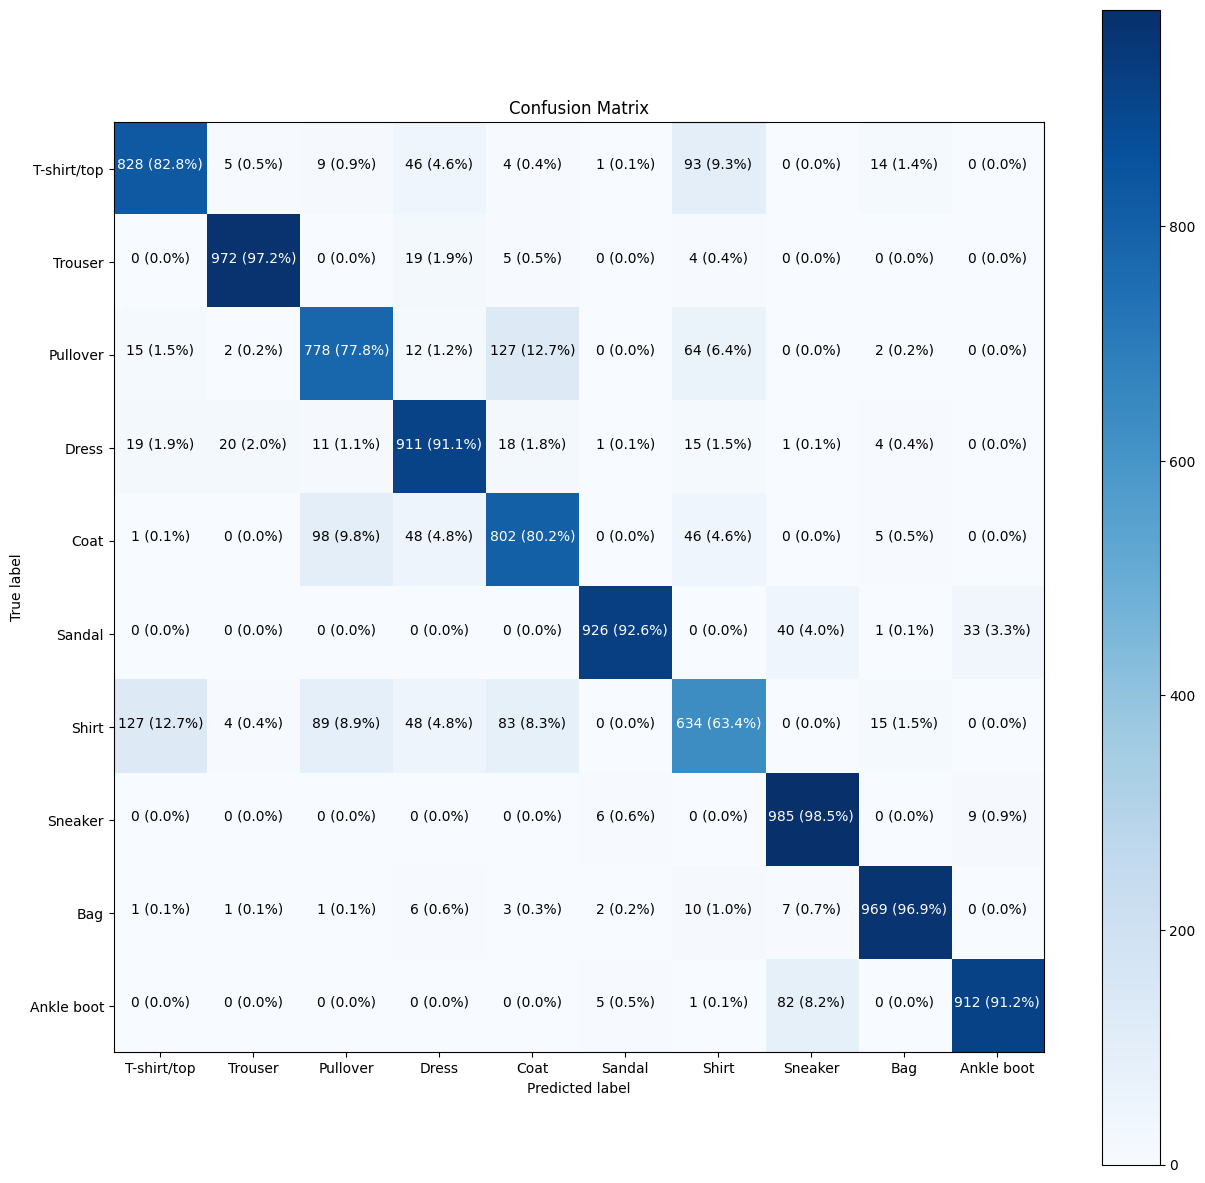

In [19]:
# compare to expected
plot_confusion_matrix(test_labels, y_pred, text_size=10, figsize=(15, 15), classes=class_names)

# [Module 87 mutli class classification 9: visualizing random samples](https://youtu.be/ZUKz4125WNI?t=12600)

let's make a function that plots a random image, then makes a prediction, and lebels the plot with the true and labelled prediction

In [21]:
def plot_random_image(model, images, true_labels, classes):
    """Picks a random image, plots it and labels it with a predicted and truth label.

    Args:
        model: a trained model (trained on data similar to what's in images).
        images: a set of random images (in tensor form).
        true_labels: array of ground truth labels for images.
        classes: array of class names for images.

    Returns:
        A plot of a random image from `images` with a predicted class label from `model`
        as well as the truth class label from `true_labels`.
    """
    # Setup random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 10ms/step


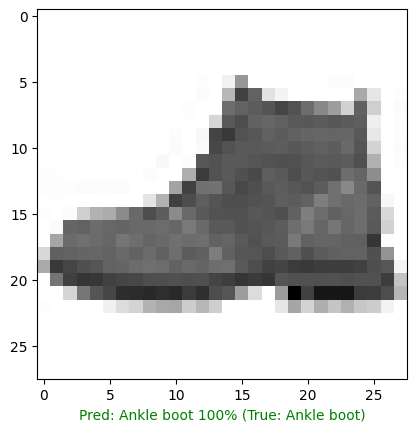

In [31]:
plot_random_image(model=multi_model4, images=normalized_x_test, true_labels=test_labels, classes=class_names)

# [Module 88 what patterns is our model learning?](https://youtu.be/ZUKz4125WNI?t=13242)
final video! so sad

In [37]:
multi_model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [36]:
# extract a layer
multi_model4.layers[1]
# get pattenrs of layer
weights, biases = multi_model4.layers[1].get_weights()
print(weights.shape) # 1 value per datapoint
print(weights)

(784, 50)
[[ 2.00384110e-03  2.99292356e-02  6.96954355e-02 ... -7.45761022e-02
   5.32200783e-02  1.00165606e-02]
 [ 3.04370001e-02  2.33332068e-03  5.05836047e-02 ... -1.95953161e-01
   2.07082048e-01 -1.94685429e-01]
 [ 7.59361759e-02 -1.41307354e-01  1.21928670e-01 ... -3.03438258e+00
   2.68911533e-02 -1.16201556e+00]
 ...
 [ 4.83713523e-02 -6.34675920e-01  1.66778654e-01 ...  1.32538021e+00
   8.36906433e-01  9.96365726e-01]
 [ 6.47097751e-02 -3.75587761e-01  2.03267351e-01 ...  2.63290310e+00
  -1.23650335e-01  1.13133919e+00]
 [ 7.44409338e-02 -1.38289213e-01  1.05517492e-01 ... -2.68377876e+00
  -4.07847077e-01  2.43108407e-01]]


it's trying a bunch of random patterns and seeing if it matches the data. if not it tries again by using more samples, if so, it tries something similar

In [38]:
# bias and biases shape. 1 value per hidden unit
print(biases.shape)
print(biases)

(50,)
[-0.03230249  1.6621854  -0.18748303 -0.01981405  0.07804303  0.33513576
 -3.495468    1.2598917   1.3723539  -0.15597406 -0.05628436 -1.3082227
 -0.73745066  0.6202083  -0.03122189  2.2610664   0.27417246  0.7453517
 -0.02323955 -0.04227103 -0.02132034  1.7538502  -0.03001914 -0.21699819
 -0.74182004  2.5317678   0.13271827  0.8982289   2.11695    -0.01668527
 -0.15352573 -0.06939873 -0.2812638  -0.03001633  0.15299642  2.1627636
  0.92873514 -0.04521689 -0.02855924 -0.02488426  1.8400726   0.16534193
 -1.3574364  -1.1256421   1.3250942  -0.03876307 -0.04793133 -3.0905273
  0.8968247   1.0414218 ]


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
